<a href="https://colab.research.google.com/github/Gizelle-16/Gitel_Scifor/blob/main/cnn_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!nvidia-smi

Sun Mar 17 05:14:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [6]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
y_train[:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_test.shape


(10000, 1)

In [11]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test = y_test.reshape(-1,)


In [13]:
classes = ['airplane', 'automobile', 'bird' , 'cat','deer', 'dog', 'frog', 'horse', 'ship','truck' ]

In [14]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

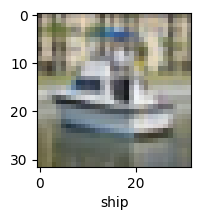

In [15]:
plot_sample(X_train, y_train, 501)

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [17]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])
ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8143 - accuracy: 0.3550
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6250 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5452 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4864 - accuracy: 0.4774
Epoch 5/5
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4363 - accuracy: 0.4959


In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_predict_classes = [np.argmax(element) for element in y_pred]

print('classification report:\n', classification_report(y_test, y_predict_classes))


313/313 [==============================] - 1s 2ms/step
classification report:
               precision    recall  f1-score   support

           0       0.59      0.49      0.54      1000
           1       0.70      0.44      0.54      1000
           2       0.41      0.35      0.38      1000
           3       0.39      0.19      0.25      1000
           4       0.49      0.34      0.40      1000
           5       0.31      0.59      0.40      1000
           6       0.55      0.49      0.51      1000
           7       0.53      0.56      0.54      1000
           8       0.55      0.70      0.61      1000
           9       0.49      0.65      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [22]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

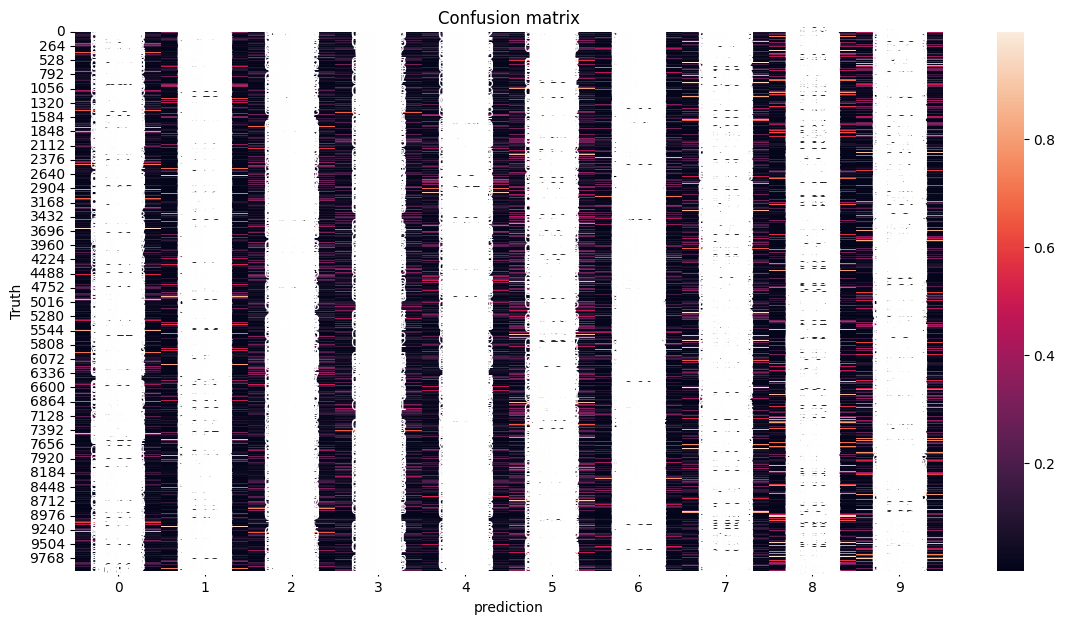

In [25]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel("prediction")
plt.title('Confusion matrix')
plt.show

In [30]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [41]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [42]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 4ms/step - loss: 1.4992 - accuracy: 0.4596
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1376 - accuracy: 0.6000
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0069 - accuracy: 0.6476
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9169 - accuracy: 0.6813
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8529 - accuracy: 0.7039
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7944 - accuracy: 0.7233
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7490 - accuracy: 0.7407
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7083 - accuracy: 0.7516
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6735 - accuracy: 0.7658
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0

In [43]:
 cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9095 - accuracy: 0.6978


[0.9094606637954712, 0.6977999806404114]

In [44]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.16067741e-03, 3.38282844e-05, 1.79020141e-03, 7.68230677e-01,
        7.46928781e-05, 2.07419723e-01, 1.09833374e-03, 2.36238102e-05,
        2.00474374e-02, 1.20817225e-04],
       [6.67125499e-03, 6.17073774e-02, 8.02484010e-07, 2.49660701e-07,
        8.22178237e-09, 7.11473831e-08, 1.17076384e-08, 1.22532640e-09,
        9.31550622e-01, 6.96764910e-05],
       [1.31789204e-02, 6.61566436e-01, 2.26106713e-04, 5.31152776e-03,
        4.76367306e-04, 8.61870649e-04, 8.31881916e-05, 8.56849656e-04,
        2.49872699e-01, 6.75660074e-02],
       [8.06676567e-01, 1.00438870e-01, 3.93418595e-02, 5.01496997e-03,
        3.39074316e-03, 3.04526824e-04, 1.04497485e-04, 5.24188275e-04,
        4.28200886e-02, 1.38371531e-03],
       [5.26434906e-06, 6.77208891e-06, 2.32222658e-02, 9.16793663e-03,
        5.82681775e-01, 1.83321314e-03, 3.83058995e-01, 2.24342384e-05,
        1.16151716e-06, 1.33776723e-07]], dtype=float32)

In [45]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [46]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

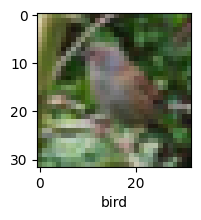

In [47]:
plot_sample(X_test, y_test, 65)

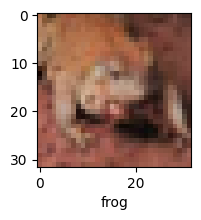

In [50]:
plot_sample(X_test, y_test, 5)

In [51]:
classes[y_classes[5]]
#should give frog

'frog'

In [52]:
classes[y_classes[60]]
#should give horse

'horse'